In [1]:
import numpy as np
import xray
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (4096 ,4096 ))
resource.getrlimit(resource.RLIMIT_NOFILE)


(4096, 4096)

In [3]:
import mdsxray
reload(mdsxray)

<module 'mdsxray' from 'mdsxray.pyc'>

In [4]:
iters = range(480, 210240, 480)
ddir = '/data/scratch/rpa/SOSE/run_np240'
store = mdsxray.MDSDataStore(ddir, iters, deltaT=900, prefix=['DiagIce-5day',])
ds = xray.Dataset.load_store(store)
ds

mdsxray.py:200: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
mdsxray.py:200: UserWarning: Not sure what to do with rlev = X
  warnings.warn("Not sure what to do with rlev = " + rlev)
mdsxray.py:445: UserWarning: Shape of variable data is not compatible with expected number of dimensions. This can arise if the 'levels' option is used in data.diagnostics. Right now we have no way to infer the level, so the variable is skipped: THETA
  "skipped: " + k)
mdsxray.py:445: UserWarning: Shape of variable data is not compatible with expected number of dimensions. This can arise if the 'levels' option is used in data.diagnostics. Right now we have no way to infer the level, so the variable is skipped: SALT
  "skipped: " + k)
mdsxray.py:445: UserWarning: Shape of variable data is not compatible with expected number of dimensions. This can arise if the 'levels' option is used in data.diagnostics. Right now we have no way to infer the leve

<xray.Dataset>
Dimensions:   (X: 2160, Xp1: 2160, Y: 320, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 41, time: 437)
Coordinates:
  * Xp1       (Xp1) >f4 5.55112e-17 0.166667 0.333333 0.5 0.666667 0.833333 ...
  * Zl        (Zl) >f4 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * Yp1       (Yp1) >f4 -77.9583 -77.7916 -77.625 -77.4583 -77.2916 -77.125 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * Y         (Y) >f4 -77.875 -77.7083 -77.5416 -77.375 -77.2083 -77.0416 ...
  * X         (X) >f4 0.0833333 0.25 0.416667 0.583333 0.75 0.916667 1.08333 ...
  * Z         (Z) >f4 -5.0 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 -125.5 ...
  * Zu        (Zu) >f4 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 -125.5 ...
  * time      (time) int64 432000 864000 1296000 1728000 2160000 2592000 ...
Data variables:
    YC        (Y, X) >f4 -77.875 -77.875 -77.875 -77.875 -77.875 -77.875 ...
    YG        (Yp1, Xp1) >f4 -77.9583 -77.9583 -77.9583 -77.9583 -77

In [106]:
from mpl_toolkits.basemap import Basemap
def southern_ocean_pcolormesh(d, boundinglat=-60., ax=None, land=True, grid=True, **kwargs):
    """Plot something in the southern ocean."""
    
    m = Basemap(projection='spstere',boundinglat=boundinglat, lon_0=180., ax=ax)
    if land:
        m.drawcoastlines()
        m.fillcontinents(color='0.7',lake_color='0.5')
    # draw parallels and meridians.
    if grid:
        m.drawparallels(np.arange(-80.,81.,10.))
        m.drawmeridians(np.arange(-180.,181.,30.), labels=[1,0,0,1])
    m.drawmapboundary(fill_color='0.5')
    #x, y = m(nc.variables['TLON'][:], nc.variables['TLAT'][:])
    lon, lat = np.meshgrid(d['X'], d['Y'])
    return m.pcolormesh(lon, lat, d.values, latlon=True, **kwargs), m

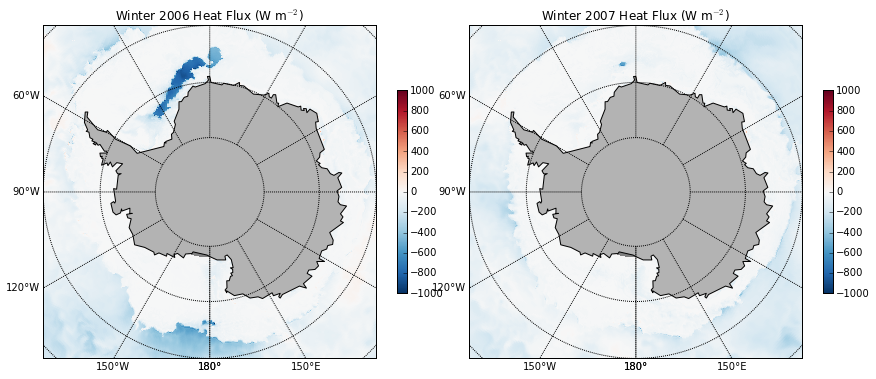

In [110]:
Qlevs = np.arange(-1000,1000,100)+50

plt.figure(figsize=(12,5))
for n, nt in enumerate([0.52, 1.52]):
    idx = int(437 * nt / 6)
    plt.subplot(1,2,n+1)
    pc, m = southern_ocean_pcolormesh(ds['TFLUX'][idx], cmap='RdBu_r')
    plt.clim([-1000,1000])
    plt.title('Winter ' + str(2006 + n) + r' Heat Flux (W m$^{-2}$)')
    plt.colorbar(shrink=0.6)
plt.tight_layout()

In [89]:
ds['time'][-1] / (24*60*60*365.)

<xray.DataArray 'time' ()>
array(5.986301369863014)
Coordinates:
    time     float64 5.986